In [0]:
import numpy 
print(numpy.__version__)

1.14.6


In [0]:
import matplotlib
print(matplotlib.__version__)

2.1.2


In [0]:
import nltk 
print(nltk.__version__)

3.2.5


In [0]:
import tensorflow 
print(tensorflow.__version__)

1.12.0


In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!/opt/bin/nvidia-smi

Fri Dec 28 01:47:39 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    56W / 149W |    116MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4661475758839125489, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1412792930045280589
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13218471657367041066
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281553818
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11215608460768530064
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
!git clone https://github.com/21-projects-for-deep-learning/image2text.git

In [0]:
!curl -O http://images.cocodataset.org/zips/val2017.zip

In [0]:
!unzip val2017.zip

In [0]:
!curl -O http://images.cocodataset.org/annotations/annotations_trainval2017.zip

In [0]:
!unzip annotations_trainval2017.zip

In [0]:
!ls -h

annotations  annotations_trainval2017.zip  image2text  val2017	val2017.zip


In [0]:
!ls annotations

captions_train2017.json   instances_val2017.json
captions_val2017.json	  person_keypoints_train2017.json
instances_train2017.json  person_keypoints_val2017.json


In [0]:
import json

json_path = "annotations/captions_val2017.json"
with open(json_path, encoding='utf-8') as f:
    json_dict = json.load(f)
print(json_dict.keys())

dict_keys(['info', 'licenses', 'images', 'annotations'])


In [0]:
images = json_dict["images"]
annotations = json_dict["annotations"]
print("images.length={}, annotations.length={}".format(len(images), len(annotations)))

images.length=5000, annotations.length=25014


In [0]:
json_dict["images"][:3]

[{'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
  'date_captured': '2013-11-14 17:02:52',
  'file_name': '000000397133.jpg',
  'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
  'height': 427,
  'id': 397133,
  'license': 4,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg',
  'date_captured': '2013-11-14 20:55:31',
  'file_name': '000000037777.jpg',
  'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg',
  'height': 230,
  'id': 37777,
  'license': 1,
  'width': 352},
 {'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
  'date_captured': '2013-11-14 22:32:02',
  'file_name': '000000252219.jpg',
  'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
  'height': 428,
  'id': 252219,
  'license': 4,
  'width': 640}]

In [0]:
json_dict["annotations"][:3]

[{'caption': 'A black Honda motorcycle parked in front of a garage.',
  'id': 38,
  'image_id': 179765},
 {'caption': 'A Honda motorcycle parked in a grass driveway',
  'id': 182,
  'image_id': 179765},
 {'caption': 'An office cubicle with four different types of computers.',
  'id': 401,
  'image_id': 190236}]

In [0]:
json_dict["info"]

{'contributor': 'COCO Consortium',
 'date_created': '2017/09/01',
 'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017}

In [0]:
json_dict["licenses"]

[{'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'},
 {'id': 2,
  'name': 'Attribution-NonCommercial License',
  'url': 'http://creativecommons.org/licenses/by-nc/2.0/'},
 {'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/'},
 {'id': 4,
  'name': 'Attribution License',
  'url': 'http://creativecommons.org/licenses/by/2.0/'},
 {'id': 5,
  'name': 'Attribution-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-sa/2.0/'},
 {'id': 6,
  'name': 'Attribution-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nd/2.0/'},
 {'id': 7,
  'name': 'No known copyright restrictions',
  'url': 'http://flickr.com/commons/usage/'},
 {'id': 8,
  'name': 'United States Government Work',
  'url': 'http://www.usa.gov/copyright.shtml'}]

图片的相应属性有：
{'license': 1, 'file_name': '000000037777.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg', 'height': 230, 'width': 352, 'date_captured': '2013-11-14 20:55:31', 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg', 'id': 37777}
图片的字幕属性有：
{'image_id': 37777, 'id': 597185, 'caption': 'The dining table near the kitchen has a bowl of fruit on it.'}


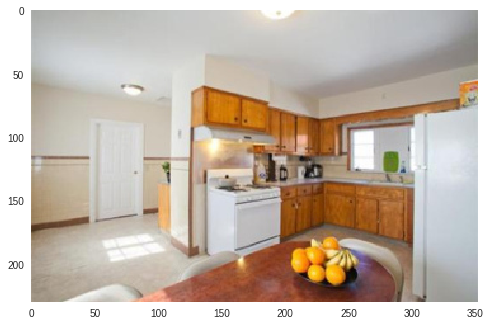

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

def plot_preview_image(filename):
    for img_anno in annotations:
        if img_anno["image_id"] == filename:
            for img_prop in images:
                file_name = img_prop["file_name"][:-4]
                if int(file_name) == filename:
                    img = pltimg.imread("val2017/" + img_prop["file_name"])
                    plt.grid(False)
                    plt.imshow(img)
                    print("图片的相应属性有：")
                    print(img_prop)
                    break
            print("图片的字幕属性有：")
            print(img_anno)
            break
plot_preview_image(int("000000037777"))

图片的相应属性有：
{'license': 6, 'file_name': '000000005037.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000005037.jpg', 'height': 425, 'width': 640, 'date_captured': '2013-11-16 20:17:28', 'flickr_url': 'http://farm8.staticflickr.com/7379/9599671465_8a2f486da1_z.jpg', 'id': 5037}
图片的字幕属性有：
{'image_id': 5037, 'id': 450868, 'caption': 'A passenger bus pulling up to the side of a street.'}


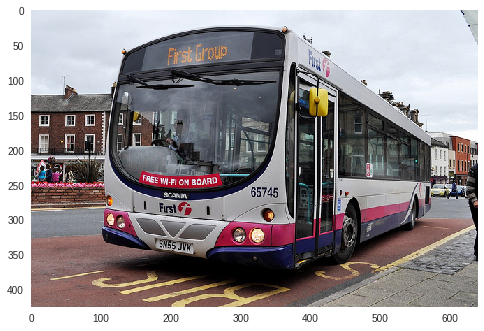

In [0]:
plot_preview_image(int("000000005037"))

In [0]:
from glob import glob

image_path = "val2017/*"
image_paths = glob(image_path)
image_paths[:10]

['val2017/000000190236.jpg',
 'val2017/000000032038.jpg',
 'val2017/000000388056.jpg',
 'val2017/000000150417.jpg',
 'val2017/000000415238.jpg',
 'val2017/000000192716.jpg',
 'val2017/000000262895.jpg',
 'val2017/000000569059.jpg',
 'val2017/000000075393.jpg',
 'val2017/000000416256.jpg']

In [0]:
print("一共有图片{}张。".format(len(image_paths)))

一共有图片5000张。


In [0]:
!mkdir dataset
!mkdir dataset/train_images
!mkdir dataset/valid_images

In [0]:
import os
import shutil

train_path = os.getcwd() + "/dataset/train_images/"
valid_path = os.getcwd() + "/dataset/valid_images/"

# 分割4500张图片作为训练集
for img_path in image_paths[:4500]:
    filename = img_path[len("val2017/"):]
    shutil.move(img_path, train_path + filename)
    
# 分割500张图片作为测试集
for img_path in image_paths[4500:]:
    filename = img_path[len("val2017/"):]
    shutil.move(img_path, valid_path + filename)

In [0]:
!ls dataset/

train_images  valid_images


In [0]:
# 读取训练集和测试集的图片路径
train_img_paths = glob(train_path + "*")
valid_img_paths = glob(valid_path + "*")
train_img_paths[:10]

['/content/dataset/train_images/000000190236.jpg',
 '/content/dataset/train_images/000000032038.jpg',
 '/content/dataset/train_images/000000388056.jpg',
 '/content/dataset/train_images/000000150417.jpg',
 '/content/dataset/train_images/000000415238.jpg',
 '/content/dataset/train_images/000000192716.jpg',
 '/content/dataset/train_images/000000262895.jpg',
 '/content/dataset/train_images/000000569059.jpg',
 '/content/dataset/train_images/000000075393.jpg',
 '/content/dataset/train_images/000000416256.jpg']

In [0]:
def generate_images_and_annotations(img_paths, is_train=False):
    img_path_prefix = len(os.getcwd() + "/dataset/" + ("train_images/" if is_train else "valid_images/"))
    img_prefix_len = len("000000570664")

    train_anntate_json = []
    train_image_json = []
    for img_path in img_paths:
      
        img_filename = img_path[img_path_prefix:img_path_prefix+img_prefix_len]
        for img_annotate in annotations:
            if img_annotate["image_id"] == int(img_filename):
                train_anntate_json.append(img_annotate) 
                break
                
        img_filename = img_path[img_path_prefix:]
        for img_prop in images:
            if img_prop["file_name"] == img_filename:
                train_image_json.append(img_prop)
                break
                
    return train_image_json, train_anntate_json

train_image_json, train_anntate_json = generate_images_and_annotations(train_img_paths)

In [0]:
train_anntate_json[:2]

[{'caption': 'An office cubicle with four different types of computers.',
  'id': 401,
  'image_id': 190236},
 {'caption': 'A large cheese pizza being served to customers.',
  'id': 97517,
  'image_id': 32038}]

In [0]:
train_image_json[:2]

[{'coco_url': 'http://images.cocodataset.org/val2017/000000190236.jpg',
  'date_captured': '2013-11-15 17:09:36',
  'file_name': '000000190236.jpg',
  'flickr_url': 'http://farm1.staticflickr.com/244/535469198_ee68a4b0c1_z.jpg',
  'height': 393,
  'id': 190236,
  'license': 1,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/val2017/000000032038.jpg',
  'date_captured': '2013-11-23 03:01:14',
  'file_name': '000000032038.jpg',
  'flickr_url': 'http://farm3.staticflickr.com/2692/4423705330_3ca7e5f6ca_z.jpg',
  'height': 500,
  'id': 32038,
  'license': 5,
  'width': 333}]

In [0]:
# 验证集
valid_image_json, valid_anntate_json = generate_images_and_annotations(valid_img_paths, is_train=True)

In [0]:
valid_anntate_json[:2]

[{'caption': 'a man is riding a surfboard at the beach',
  'id': 775977,
  'image_id': 183127},
 {'caption': 'Railway car on snow covered tracks approaching urban area.',
  'id': 675442,
  'image_id': 42563}]

In [0]:
valid_image_json[:2]

[{'coco_url': 'http://images.cocodataset.org/val2017/000000183127.jpg',
  'date_captured': '2013-11-20 21:40:26',
  'file_name': '000000183127.jpg',
  'flickr_url': 'http://farm8.staticflickr.com/7252/6940904516_3f096b4a14_z.jpg',
  'height': 428,
  'id': 183127,
  'license': 4,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/val2017/000000042563.jpg',
  'date_captured': '2013-11-17 04:41:03',
  'file_name': '000000042563.jpg',
  'flickr_url': 'http://farm9.staticflickr.com/8356/8394031685_eda26e594d_z.jpg',
  'height': 640,
  'id': 42563,
  'license': 3,
  'width': 624}]

In [0]:
# 合并数据集以json结构

def merge_dataset(json_dict, image_json, annotate_json, save_json_path):
    # 读取info信息
    info_dict = json_dict["info"]
    # 读取license信息
    licenses_dict = json_dict["licenses"]
    # 构建json结构
    json_ds = {
        "info" : info_dict,
        "licenses" : licenses_dict,
        "images" : image_json,
        "annotations" : annotate_json
    }
    # 保存json文件
    with open(save_json_path, 'w') as f:
        f.write(json.dumps(json_ds))
        
# 合并训练集的json文件
merge_dataset(json_dict, train_image_json, train_anntate_json, "dataset/train_images.json")
# 合并验证集的json文件
merge_dataset(json_dict, valid_image_json, valid_anntate_json, "dataset/valid_images.json")

In [0]:
!ls dataset

train_images  train_images.json  valid_images  valid_images.json


In [0]:
!mv dataset image2text/im2txt/

In [0]:
!ls image2text/im2txt

BUILD		  evaluate.py		run_inference.py
configuration.py  inference_utils	show_and_tell_model.py
data		  inference_wrapper.py	show_and_tell_model_test.py
dataset		  ops			train.py


In [0]:
import os
import json
from glob import glob

# 切换目录
os.chdir("image2text/im2txt/")

# 设置训练集和验证集的路径
cwd_path = os.getcwd()
train_img_path = cwd_path + "/dataset/train_images/"
train_json_path = cwd_path + "/dataset/train_images.json"
valid_img_path = cwd_path + "/dataset/valid_images/"
valid_json_path = cwd_path + "/dataset/valid_images.json"

In [0]:
# 获取所有训练图片路径
train_img_paths = glob(train_img_path + "*")
# 获取所有的验证图片路径
valid_img_paths = glob(valid_img_path + "*")
# 加载训练标注数据
with open(train_json_path, encoding='utf-8') as f:
    train_json_dict = json.load(f)
# 加载验证标注数据
with open(valid_json_path, encoding='utf-8') as f:
    valid_json_dict = json.load(f)
# 打印基本的key
print(train_json_dict.keys())
print(valid_json_dict.keys())

dict_keys(['info', 'licenses', 'images', 'annotations'])
dict_keys(['info', 'licenses', 'images', 'annotations'])


In [0]:
train_json_img_paths = train_json_dict["images"]
valid_json_img_paths = valid_json_dict["images"]
train_json_annotations_paths = train_json_dict["annotations"]
valid_json_annotations_paths = valid_json_dict["annotations"]
print("train:\r")
print("图片有{}张，图片属性有{}条，图片标注有{}个。".format(
                                         len(train_img_paths), 
                                         len(train_json_img_paths), 
                                         len(train_json_annotations_paths)))
print("valid:\r")
print("图片有{}张，图片属性有{}条，图片标注有{}个。".format(
                                         len(valid_img_paths), 
                                         len(valid_json_img_paths), 
                                         len(valid_json_annotations_paths)))

train:
图片有4500张，图片属性有4500条，图片标注有4500个。
valid:
图片有500张，图片属性有500条，图片标注有500个。


In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
print("当前目录路径：", os.getcwd())

当前路径： /content/image2text/im2txt


In [0]:
# 将Image图像数据构建成TFRecord格式
!python data/build_mscoco_data.py \
  --train_image_dir="dataset/train_images/" \
  --val_image_dir="dataset/valid_images/" \
  --train_captions_file="dataset/train_images.json" \
  --val_captions_file="dataset/valid_images.json" \
  --output_dir="output" \
  --word_counts_output_file="output/word_counts.txt" \

Instructions for updating:
Use tf.gfile.GFile.
Loaded caption metadata for 4500 images from dataset/train_images.json
Processing captions.
Finished processing 4500 captions for 4500 images in dataset/train_images.json
Loaded caption metadata for 500 images from dataset/valid_images.json
Processing captions.
Finished processing 500 captions for 500 images in dataset/valid_images.json
Creating vocabulary.
Total words: 3389
Words in vocabulary: 1031
Wrote vocabulary file: output/word_counts.txt
2018-12-27 02:53:47.603455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-12-27 02:53:47.603972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-12-27 02:53:47.604019: I tensor

In [0]:
from glob import glob

# 查看output目录下的TFRecord图像格式的文件
tfrecords_output_files = glob("output/*")
tfrecords_output_files[:10]

train_files = []
valid_files = []
test_files = []
for output_file in tfrecords_output_files:
    if output_file.startswith("output/train"):
        train_files.append(output_file)
    elif output_file.startswith("output/val"):
        valid_files.append(output_file)
    elif output_file.startswith("output/test"):
        test_files.append(output_file)
print("TFRecords的文件个数分别有：\r")
print("训练集有{}个；".format(len(train_files)))
print("验证集有{}个；".format(len(valid_files)))
print("测试集有{}个。".format(len(test_files)))



In [0]:
# 下载Inception v3模型 
!curl -O http://download.tensorflow.org/models/inception_v3_2016_08_28.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 96.2M  100 96.2M    0     0  96.9M      0 --:--:-- --:--:-- --:--:-- 96.9M


In [0]:
# 解压
!tar -xvf inception_v3_2016_08_28.tar.gz 
# 移动到data目录下
!mv inception_v3.ckpt data/
# 查看目录里的文件
!ls -lha data

inception_v3.ckpt
total 104M
drwxr-xr-x 2 root  root 4.0K Dec 27 02:54 .
drwxr-xr-x 7 root  root 4.0K Dec 27 02:54 ..
-rwxr-xr-x 1 root  root  18K Dec 27 02:45 build_mscoco_data.py
-rwxr-xr-x 1 root  root 2.9K Dec 27 02:45 download_and_preprocess_mscoco.sh
-rw-r----- 1 77690 5000 104M Aug 29  2016 inception_v3.ckpt


In [0]:
!ls

BUILD				output
configuration.py		output_model
data				__pycache__
dataset				run_inference.py
evaluate.py			show_and_tell_model.py
inception_v3_2016_08_28.tar.gz	show_and_tell_model_test.py
inference_utils			train.py
inference_wrapper.py		test_singapore_financial_center.jpeg
ops


In [0]:
# 训练模型
!python train.py \
  --input_file_pattern="output/train-00000-of-00256" \
  --inception_checkpoint_file="data/inception_v3.ckpt" \
  --train_dir="output_model/train" \
  --train_inception=false \
  --number_of_steps=10000

INFO:tensorflow:Creating training directory: output_model/train
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.
INFO:tensorflow:Prefetching values from 1 files matching output/train-00000-of-00256
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipeline

In [0]:
!ls

BUILD				ops
configuration.py		output
data				output_model
dataset				__pycache__
evaluate.py			run_inference.py
inception_v3_2016_08_28.tar.gz	show_and_tell_model.py
inference_utils			show_and_tell_model_test.py
inference_wrapper.py		train.py


In [0]:
# 评估模型
!python evaluate.py \
  --input_file_pattern="output/val-00000-of-00004" \
  --checkpoint_dir="output_model/train" \
  --eval_dir="output_model/valid" \
  --min_global_step=500

INFO:tensorflow:Creating eval directory: output_model/valid
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.
INFO:tensorflow:Prefetching values from 1 files matching output/val-00000-of-00004
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use

In [0]:
!ls -lha output_model/train

total 733M
drwxr-xr-x 2 root root 4.0K Dec 27 04:13 .
drwxr-xr-x 4 root root 4.0K Dec 27 04:30 ..
-rw-r--r-- 1 root root  273 Dec 27 04:13 checkpoint
-rw-r--r-- 1 root root 9.3M Dec 27 04:13 events.out.tfevents.1545879306.854c404c9fd3
-rw-r--r-- 1 root root 3.6M Dec 27 02:55 graph.pbtxt
-rw-r--r-- 1 root root 143M Dec 27 04:13 model.ckpt-10000.data-00000-of-00001
-rw-r--r-- 1 root root  17K Dec 27 04:13 model.ckpt-10000.index
-rw-r--r-- 1 root root 1.8M Dec 27 04:13 model.ckpt-10000.meta
-rw-r--r-- 1 root root 143M Dec 27 03:35 model.ckpt-5055.data-00000-of-00001
-rw-r--r-- 1 root root  17K Dec 27 03:35 model.ckpt-5055.index
-rw-r--r-- 1 root root 1.8M Dec 27 03:35 model.ckpt-5055.meta
-rw-r--r-- 1 root root 143M Dec 27 03:45 model.ckpt-6329.data-00000-of-00001
-rw-r--r-- 1 root root  17K Dec 27 03:45 model.ckpt-6329.index
-rw-r--r-- 1 root root 1.8M Dec 27 03:45 model.ckpt-6329.meta
-rw-r--r-- 1 root root 143M Dec 27 03:55 model.ckpt-7599.data-00000-of-00001
-rw-r--r-- 1 root root  17

In [0]:
!ls output_model/valid

events.out.tfevents.1545885025.854c404c9fd3


In [0]:
import os
os.chdir("image2text/im2txt/")

In [0]:
# 生成图像标题
!python run_inference.py \
  --checkpoint_path="output_model/train" \
  --vocab_file="output/word_counts.txt" \
  --input_files="test_singapore_financial_center.jpeg" 

INFO:tensorflow:Building model.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.
Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
INFO:tensorflow:Initializing vocabulary from file: output/word_counts.txt
INFO:tensorflow:Created vocabulary with 1032 words
INFO:tensorflow:Running caption generation on 1 files matching test_singapore_financial_center.jpeg
2018-12-27 07:12:19.231801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-12-27 07:12:19.232304: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz)

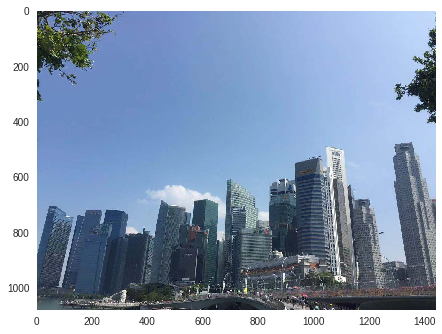

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

img = pltimg.imread("test_singapore_financial_center.jpeg") 
plt.grid(False)
plt.imshow(img)